In [106]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import mplfinance as mpf

In [114]:
def get_crypto_and_stock(crypto_ticker, stock_ticker, period='3y'):
    crypto = yf.Ticker(crypto_ticker)
    stock = yf.Ticker(stock_ticker)
    crypto_hist = crypto.history(period=period)
    stock_hist = stock.history(period=period)
    mpf.plot(crypto_hist, type='candle', style='yahoo', mav=(5,20,60), volume=True, figsize=(16, 8), title='{} Price'.format(crypto_ticker))
    mpf.plot(stock_hist, type='candle', style='yahoo', mav=(5,20,60), volume=True, figsize=(16, 8), title='{} Price'.format(stock_ticker))
    return (crypto_hist, stock_hist)
    
def draw_premium(df_crypto, df_stock, crypto_per_share):
    df = pd.DataFrame({'Value': df_crypto['Close'] * crypto_per_share})
    df['Value'].plot(label='Crypto Value', figsize=(16,8))
    df_stock['Close'].plot(label='Stock Value')
    plt.legend()

def draw_premium_percentage(df_crypto, df_stock, crypto_per_share):
    df = pd.DataFrame({'Value': df_crypto['Close'] * crypto_per_share})
    df1 = pd.DataFrame({'Percent': (df_stock['Close'] - df['Value']) / df_stock['Close']})
    df2 = df_stock.join([df, df1]).dropna()

    df2['Percent'].plot.area(figsize=(16,8))
    plt.title('Premium percentage')
    return df2

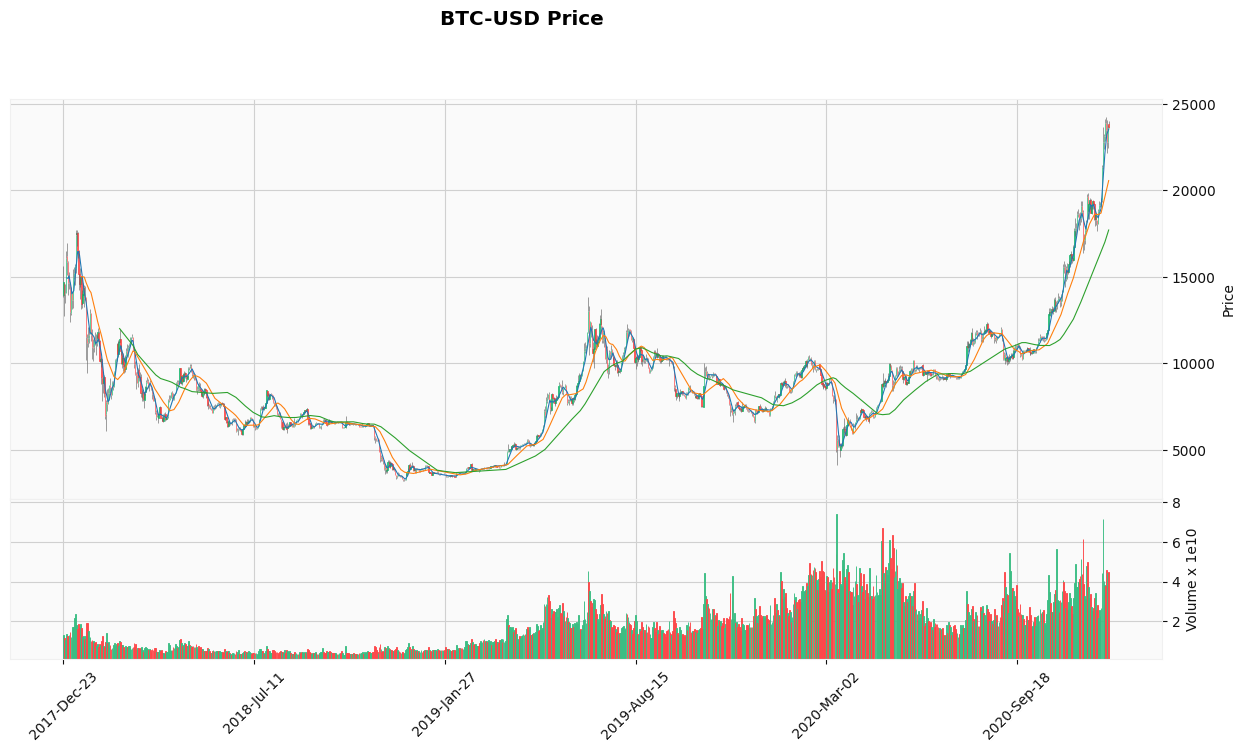

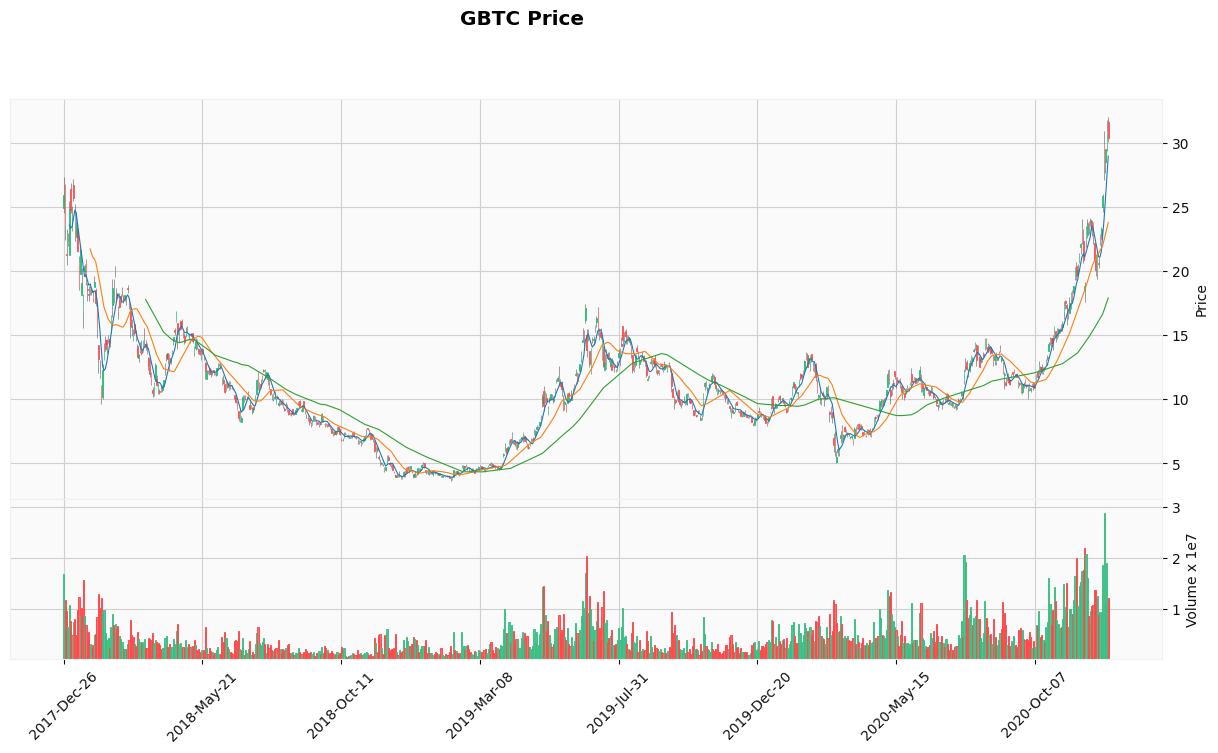

In [115]:
%matplotlib inline
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC')

In [116]:
%matplotlib widget
df = draw_premium_percentage(btc, gbtc, 0.00095059)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

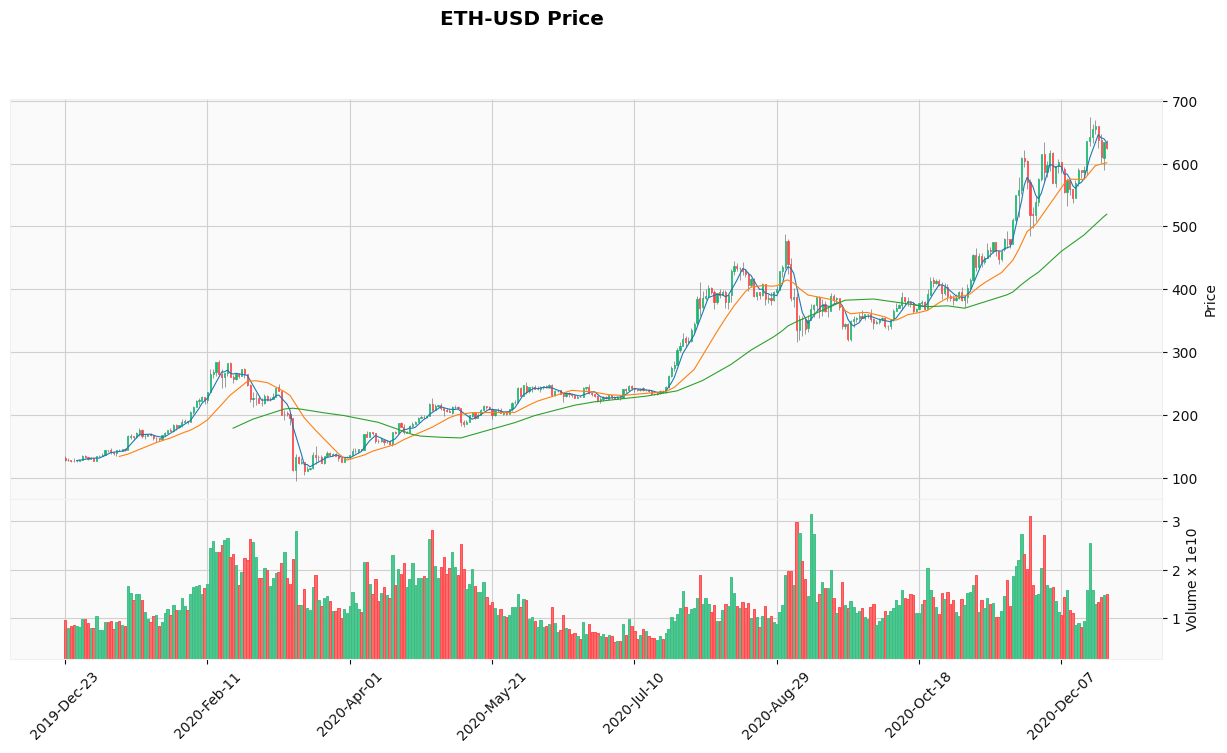

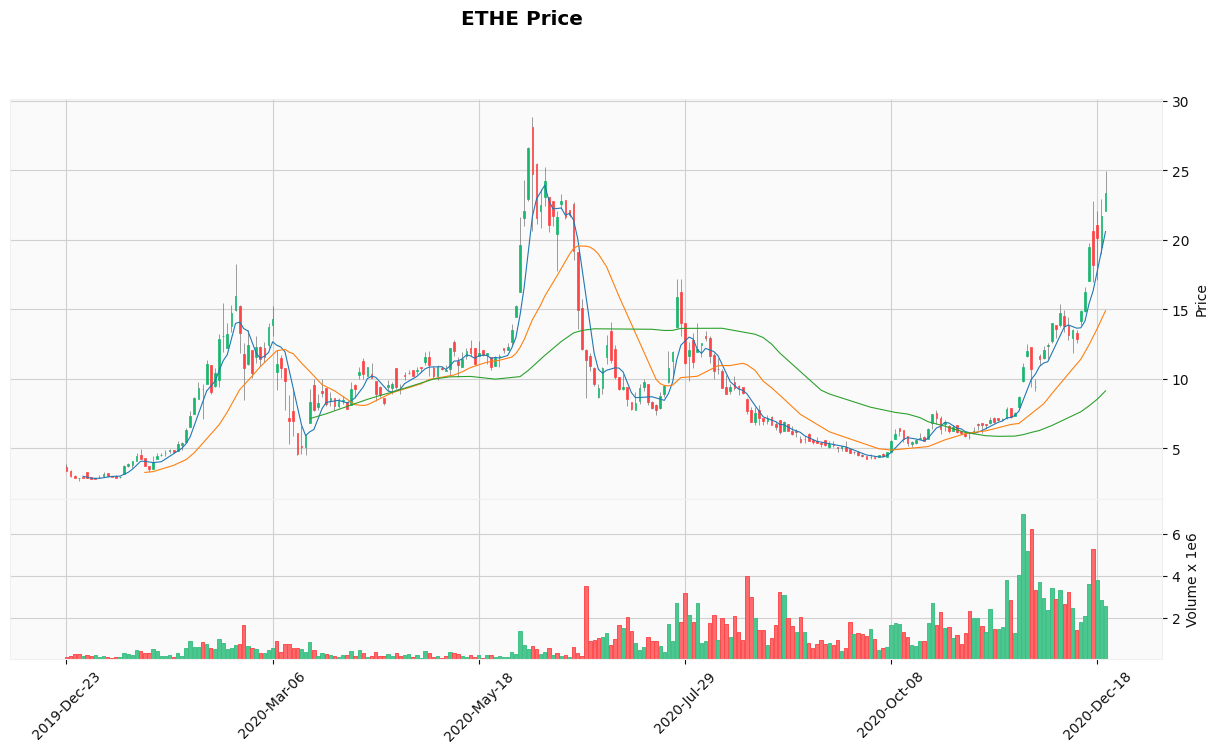

In [121]:
%matplotlib inline
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', period='1y')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

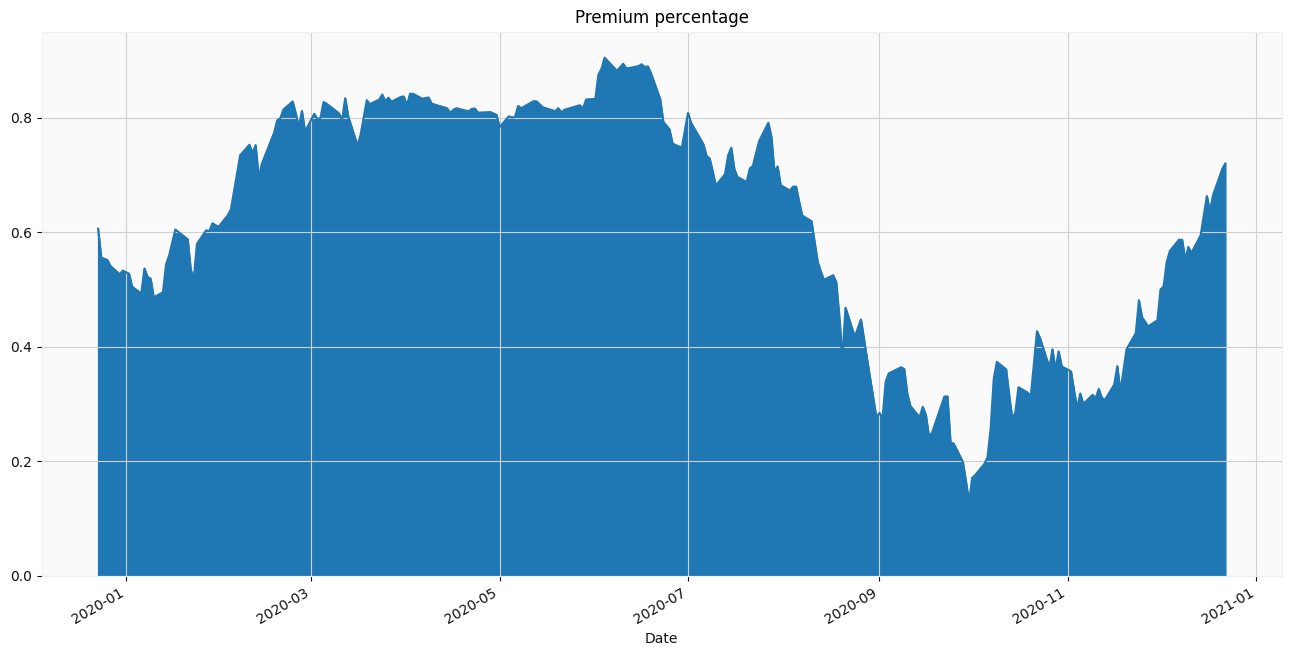

In [122]:
%matplotlib widget
df = draw_premium_percentage(eth, ethe, 0.01030231)